In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# get the week a tree transitions for a certain attribute
# tree_df - dataframe with user_tree_id equal across all rows
# zero_to_one - if True, find transition weeks for transitions from 0 to 1. If false, find weeks of 1 to 0 transitions
def get_transition_week(tree_df, attr, zero_to_one=True):
    transition_weeks = []
    for week in tree_df['Week'].unique():
        tree_df_week = tree_df[tree_df['Week'] == week]
        tree_df_next_week = tree_df[tree_df['Week'] == (week + 1) % 48]
        if len(tree_df_week) > 0 and len(tree_df_next_week) > 0:
            tree_df_week_attr_zero = tree_df_week[tree_df_week[attr] == 0]
            tree_df_week_attr_one = tree_df_week[tree_df_week[attr] == 1]
            tree_df_next_week_attr_zero = tree_df_next_week[tree_df_next_week[attr] == 0]
            tree_df_next_week_attr_one = tree_df_next_week[tree_df_next_week[attr] == 1]
            if zero_to_one:
                if len(tree_df_week_attr_zero) > 0 and len(tree_df_week_attr_one) == 0 and len(tree_df_next_week_attr_one) > 0:
                    transition_weeks.append(week)
            else:
                if len(tree_df_week_attr_one) > 0 and len(tree_df_week_attr_zero) == 0 and len(tree_df_next_week_attr_zero) > 0:
                    transition_weeks.append(week)
    return transition_weeks

In [12]:
def get_transition_data(state_df, species_id, attr, year):
    species_df = state_df[state_df['Species_id'] == species_id]
    species_df_year = species_df[species_df['Year'] == year]
    transitions = np.zeros(48)
    for tree_id in species_df_year['User_Tree_id'].unique():
        tree_id_df = species_df_year[species_df_year['User_Tree_id'] == tree_id]
        for week in get_transition_week(tree_id_df, attr, zero_to_one=True):
            transitions[week % 48] += 1
    return transitions

In [16]:
def get_percent_data(state_df, species_id, attr, year):
    species_df = state_df[state_df['Species_id'] == species_id]
    species_df = species_df[species_df['Year'] == year]
    species_df = species_df[species_df[attr] >= 0]
    pcts = []
    for week in range(48):
        species_df_week = species_df[species_df['Week'] == week]
        N = len(species_df_week)
        if N == 0:
            pcts.append(0)
        else:
            species_df_week_observed = species_df_week[species_df_week[attr] > 0]
            pcts.append(len(species_df_week_observed) / N)
    return pcts

In [20]:
def plot_probs(species_id, attr, year):
    state_df = pd.read_csv('all data/citizen/kerala.csv')
    transition_data = get_transition_data(state_df, species_id, attr, year)
    transition_probs = transition_data / np.sum(transition_data)
    pcts = get_percent_data(state_df, species_id, attr, year)
    fig, ax = plt.subplots()
    ax.bar(range(48), transition_probs, label='transition probs', alpha=0.25)
    ax.set(xlabel='week', ylabel='transition probability', title=f'transition probability for {species_id}, {attr}, {year}, kerala')
    ax.legend(loc='upper right')
    twin = ax.twinx()
    twin.plot(range(48), pcts, label='percent of observations')
    twin.set(ylabel='percent of observations')
    plt.show()

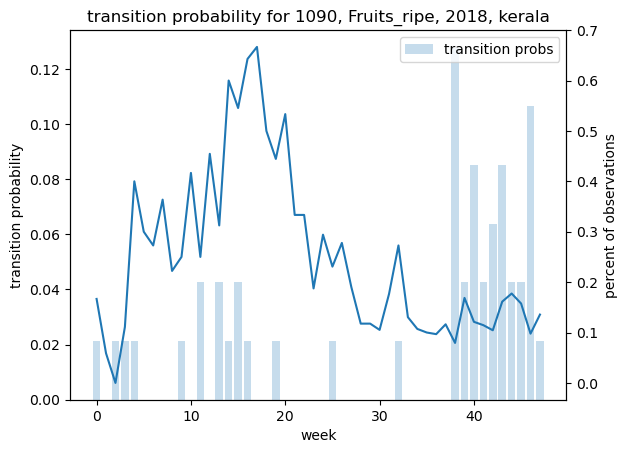

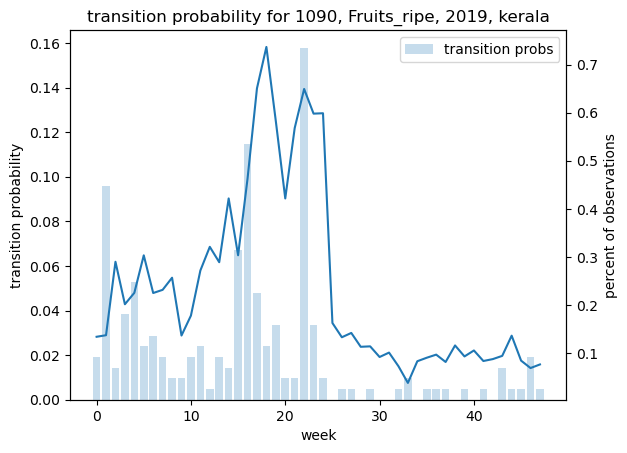

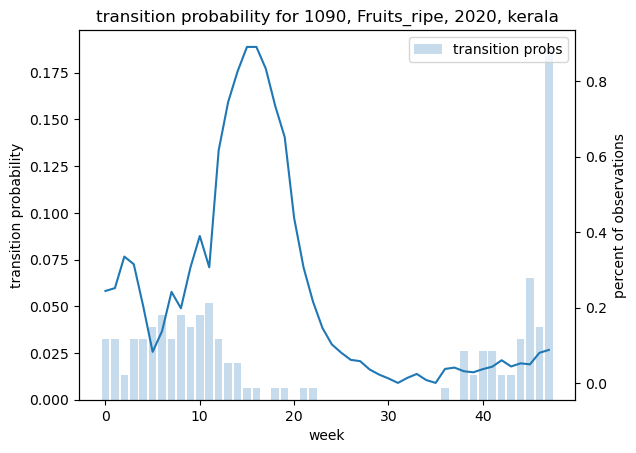

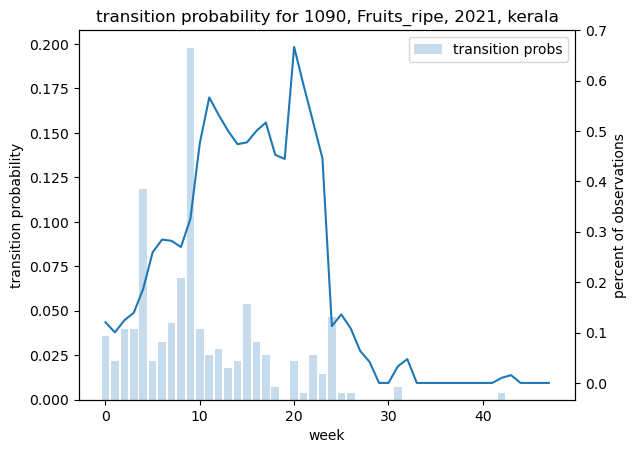

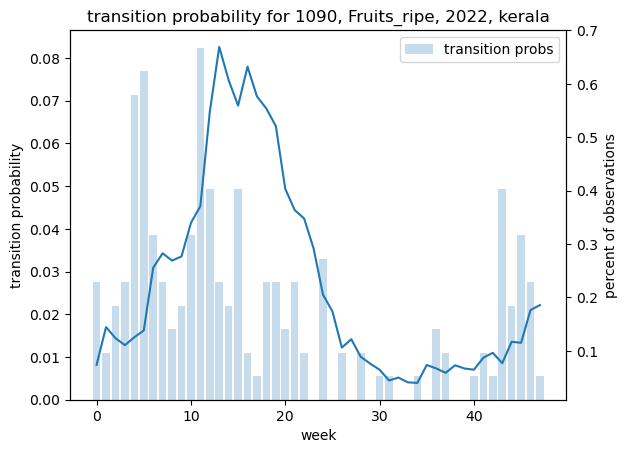

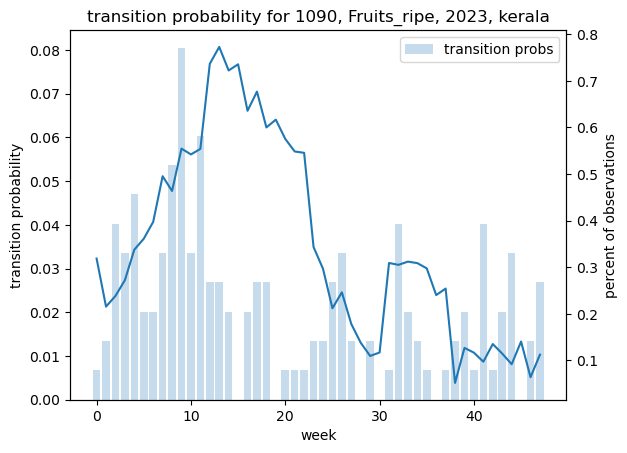

In [21]:
for year in range(2018, 2024):
    plot_probs(1090, 'Fruits_ripe', year)